# 07 - a - Saturn - Feasibility Charts - Lift

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Set up the planet and atmosphere model.
planet=Planet("SATURN")
planet.h_skip = 1000e3
planet.h_low = 50e3
planet.loadAtmosphereModel('../atmdata/Saturn/saturn-nominal.dat', 0 , 1 , 2, 3, heightInKmFlag=True)

In [9]:
vinf_kms_array = np.linspace( 0.0,   30.0,  11)
LD_array       = np.linspace( 0.0,    1.0 , 11)

In [4]:
os.makedirs('../data/jsr-paper/saturn/')

In [10]:
runID = 'saturn-lift-'

num_total      = len(vinf_kms_array)*len(LD_array)
count = 1

v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 +\
                          2*np.ones(len(vinf_kms_array))*\
                          planet.GM/(planet.RP+1000.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(LD_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(LD_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(LD_array)))

In [11]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-5)
        overShootLimit_array[i,j],  exitflag_os_array[i,j]  = vehicle.findOverShootLimit (2400.0, 1.0, -30.0, -4.0, 1E-10, 265.0e3)
        underShootLimit_array[i,j], exitflag_us_array[i,j] =  vehicle.findUnderShootLimit(2400.0, 1.0, -30.0, -4.0, 1E-10, 265.0e3)

        TCW_array[i,j] = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print("Run #"+str(count)+" of "+ str(num_total)+": Arrival V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D:"+str(LD_array[j]) + " OSL: "+str(overShootLimit_array[i,j])+" USL: "+str(underShootLimit_array[i,j])+", TCW: "+str(TCW_array[i,j])+" EFOS: "+str(exitflag_os_array[i,j])+ " EFUS: "+str(exitflag_us_array[i,j]))
        count = count +1

np.savetxt('../data/jsr-paper/saturn/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'LD_array.txt',LD_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'undershootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'TCW_array.txt',TCW_array)

Run #1 of 121: Arrival V_infty: 0.0 km/s, L/D:0.0 OSL: -6.886633370348136 USL: -6.886633370348136, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #2 of 121: Arrival V_infty: 0.0 km/s, L/D:0.1 OSL: -6.812789838899334 USL: -6.963913786225021, TCW: 0.15112394732568646 EFOS: 1.0 EFUS: 1.0
Run #3 of 121: Arrival V_infty: 0.0 km/s, L/D:0.2 OSL: -6.742585244574002 USL: -7.04459664553724, TCW: 0.302011400963238 EFOS: 1.0 EFUS: 1.0
Run #4 of 121: Arrival V_infty: 0.0 km/s, L/D:0.30000000000000004 OSL: -6.675457459838071 USL: -7.12883265929122, TCW: 0.4533751994531485 EFOS: 1.0 EFUS: 1.0
Run #5 of 121: Arrival V_infty: 0.0 km/s, L/D:0.4 OSL: -6.611828796463669 USL: -7.217168788585695, TCW: 0.6053399921220262 EFOS: 1.0 EFUS: 1.0
Run #6 of 121: Arrival V_infty: 0.0 km/s, L/D:0.5 OSL: -6.550989555173146 USL: -7.309051262025605, TCW: 0.7580617068524589 EFOS: 1.0 EFUS: 1.0
Run #7 of 121: Arrival V_infty: 0.0 km/s, L/D:0.6000000000000001 OSL: -6.493338031134044 USL: -7.404754286355455, TCW: 0.9114162552214111 EFOS:

Run #57 of 121: Arrival V_infty: 15.0 km/s, L/D:0.1 OSL: -7.183285026861995 USL: -7.464286358801473, TCW: 0.2810013319394784 EFOS: 1.0 EFUS: 1.0
Run #58 of 121: Arrival V_infty: 15.0 km/s, L/D:0.2 OSL: -7.061326548879151 USL: -7.6252012762925006, TCW: 0.5638747274133493 EFOS: 1.0 EFUS: 1.0
Run #59 of 121: Arrival V_infty: 15.0 km/s, L/D:0.30000000000000004 OSL: -6.95061637921026 USL: -7.798918289459834, TCW: 0.8483019102495746 EFOS: 1.0 EFUS: 1.0
Run #60 of 121: Arrival V_infty: 15.0 km/s, L/D:0.4 OSL: -6.850065169244772 USL: -7.987403416023881, TCW: 1.1373382467791089 EFOS: 1.0 EFUS: 1.0
Run #61 of 121: Arrival V_infty: 15.0 km/s, L/D:0.5 OSL: -6.75879588949465 USL: -8.191059829594451, TCW: 1.4322639400998014 EFOS: 1.0 EFUS: 1.0
Run #62 of 121: Arrival V_infty: 15.0 km/s, L/D:0.6000000000000001 OSL: -6.6757108615056495 USL: -8.408050090562028, TCW: 1.7323392290563788 EFOS: 1.0 EFUS: 1.0
Run #63 of 121: Arrival V_infty: 15.0 km/s, L/D:0.7000000000000001 OSL: -6.60005213750992 USL: -8.6

Run #113 of 121: Arrival V_infty: 30.0 km/s, L/D:0.2 OSL: -7.343681289399683 USL: -8.490964959040866, TCW: 1.1472836696411832 EFOS: 1.0 EFUS: 1.0
Run #114 of 121: Arrival V_infty: 30.0 km/s, L/D:0.30000000000000004 OSL: -7.172631128494686 USL: -8.924815455677162, TCW: 1.7521843271824764 EFOS: 1.0 EFUS: 1.0
Run #115 of 121: Arrival V_infty: 30.0 km/s, L/D:0.4 OSL: -7.031803393409064 USL: -9.419318771200778, TCW: 2.387515377791715 EFOS: 1.0 EFUS: 1.0
Run #116 of 121: Arrival V_infty: 30.0 km/s, L/D:0.5 OSL: -6.914241488178959 USL: -9.972124349522346, TCW: 3.057882861343387 EFOS: 1.0 EFUS: 1.0
Run #117 of 121: Arrival V_infty: 30.0 km/s, L/D:0.6000000000000001 OSL: -6.814171822443313 USL: -10.57726046237076, TCW: 3.763088639927446 EFOS: 1.0 EFUS: 1.0
Run #118 of 121: Arrival V_infty: 30.0 km/s, L/D:0.7000000000000001 OSL: -6.727330858047935 USL: -11.229219044609636, TCW: 4.5018881865617 EFOS: 1.0 EFUS: 1.0
Run #119 of 121: Arrival V_infty: 30.0 km/s, L/D:0.8 OSL: -6.651091770057974 USL: -

In [12]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(LD_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(LD_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(LD_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(LD_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.propogateEntry (2400.0, 1.0, 180.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload

        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.propogateEntry (2400.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_us))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D: "+str(LD_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))


np.savetxt('../data/jsr-paper/saturn/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, L/D: 0.0 G_MAX: 2.2380106468687773 QDOT_MAX: 717.9389837034478 J_MAX: 129976.61377323652 STAG. PRES: 0.043357923446794594
V_infty: 0.0 km/s, L/D: 0.1 G_MAX: 2.3437467372537566 QDOT_MAX: 733.0925568470867 J_MAX: 132039.22993603474 STAG. PRES: 0.041591651952814446
V_infty: 0.0 km/s, L/D: 0.2 G_MAX: 2.4769742301935027 QDOT_MAX: 748.3914702860064 J_MAX: 134138.746337036 STAG. PRES: 0.03990534181399003
V_infty: 0.0 km/s, L/D: 0.30000000000000004 G_MAX: 2.6399780740061285 QDOT_MAX: 763.9159326941137 J_MAX: 136236.36277629616 STAG. PRES: 0.038263868326281425
V_infty: 0.0 km/s, L/D: 0.4 G_MAX: 2.8364313168705975 QDOT_MAX: 779.9055271724576 J_MAX: 138419.1355258049 STAG. PRES: 0.036718853371113025
V_infty: 0.0 km/s, L/D: 0.5 G_MAX: 3.0638142163346593 QDOT_MAX: 795.8858254350162 J_MAX: 140576.76574633943 STAG. PRES: 0.03521211825583597
V_infty: 0.0 km/s, L/D: 0.6000000000000001 G_MAX: 3.3237378410004608 QDOT_MAX: 812.0432562444495 J_MAX: 142782.3308805871 STAG. PRES: 0.0337767

V_infty: 15.0 km/s, L/D: 0.30000000000000004 G_MAX: 6.339693900389184 QDOT_MAX: 1351.493957843136 J_MAX: 219483.6983346919 STAG. PRES: 0.07298922788991853
V_infty: 15.0 km/s, L/D: 0.4 G_MAX: 7.046852388123195 QDOT_MAX: 1407.2424220741573 J_MAX: 225939.37112661262 STAG. PRES: 0.06731728557362891
V_infty: 15.0 km/s, L/D: 0.5 G_MAX: 7.871322649364641 QDOT_MAX: 1464.6555902840953 J_MAX: 232440.24250564 STAG. PRES: 0.062138474824016264
V_infty: 15.0 km/s, L/D: 0.6000000000000001 G_MAX: 8.810930078681583 QDOT_MAX: 1522.9213950124815 J_MAX: 239027.268359933 STAG. PRES: 0.057442398760789486
V_infty: 15.0 km/s, L/D: 0.7000000000000001 G_MAX: 9.871373534686887 QDOT_MAX: 1581.9786847462046 J_MAX: 245629.04691965418 STAG. PRES: 0.05319669786648506
V_infty: 15.0 km/s, L/D: 0.8 G_MAX: 11.075534139705193 QDOT_MAX: 1642.801648860263 J_MAX: 252194.2153759143 STAG. PRES: 0.049368148905046545
V_infty: 15.0 km/s, L/D: 0.9 G_MAX: 12.407040853555426 QDOT_MAX: 1704.4275083696023 J_MAX: 258718.84072073625 STA

V_infty: 30.0 km/s, L/D: 0.5 G_MAX: 29.77777504931889 QDOT_MAX: 5468.109350675368 J_MAX: 498317.7703051502 STAG. PRES: 0.11303993104275512
V_infty: 30.0 km/s, L/D: 0.6000000000000001 G_MAX: 34.98406606865331 QDOT_MAX: 6110.276532711647 J_MAX: 520517.91931661783 STAG. PRES: 0.09953216669797063
V_infty: 30.0 km/s, L/D: 0.7000000000000001 G_MAX: 40.889360507643886 QDOT_MAX: 6808.979452877515 J_MAX: 542284.4496847636 STAG. PRES: 0.0886699985502327
V_infty: 30.0 km/s, L/D: 0.8 G_MAX: 47.48695008277542 QDOT_MAX: 7560.886155844075 J_MAX: 563659.74166031 STAG. PRES: 0.07988659765012956
V_infty: 30.0 km/s, L/D: 0.9 G_MAX: 54.81055239929137 QDOT_MAX: 8356.645918455428 J_MAX: 584494.1626790692 STAG. PRES: 0.07269124852505386
V_infty: 30.0 km/s, L/D: 1.0 G_MAX: 62.91253549874263 QDOT_MAX: 9205.997841369557 J_MAX: 604834.9423468049 STAG. PRES: 0.06667842486042036


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

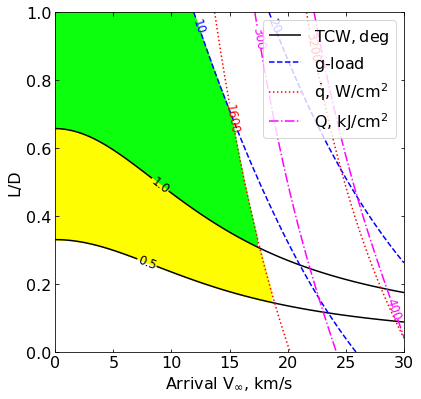

In [13]:
x = np.loadtxt('../data/jsr-paper/saturn/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/saturn/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   30,  210)
y_new =  np.linspace( 0.0,   1 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        #s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
#S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)


Zlevels = np.array([0.5,1.0])

Glevels = np.array([10.0, 20.0])
Qlevels = np.array([1600, 3200.0])
Hlevels = np.array([300, 400])
#Slevels = np.array([0.8])


plt.figure()
#plt.rcParams["font.family"] = "Times New Roman"
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')

fig = plt.figure()
fig.set_size_inches([6.25,6.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=12, colors='black',fmt='%.1f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

plt.clabel(GCS1, inline=1, fontsize=12, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=12, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)

QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='magenta',linestyles='dashdot')

plt.clabel(HCS1, inline=1, fontsize=12, colors='magenta',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.5)
HCS1.collections[1].set_linewidths(1.5)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')



#SCS1 = plt.contour(X, Y, transpose(S1), levels=Slevels, colors='cyan')

#plt.clabel(SCS1, inline=1, fontsize=12, colors='cyan',fmt='%.1f',inline_spacing=1)
#SCS1.collections[0].set_linewidths(3.0)
#SCS1.collections[0].set_label(r'$Peak$'+r' '+r'$stag. pressure,atm$')

#plt.axhline(y=0.36,linewidth=1, linestyle='dotted' ,color='white',label=r'$Apollo$'+' '+r'$CM$'+' '+r'$L/D$')



#matplotlib.rcParams['text.usetex'] = True
#plt.rc('text', usetex=True)


# circles for b=50 plot
#plt.plot(7.5,0.20,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.30,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)

#plt.plot(7.5,0.211,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.315,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)


#plt.grid(True,linestyle='dotted', linewidth=0.1)
params = {'mathtext.default': 'regular' }          
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=16)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=16)
plt.xticks( fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=16)

dat0 = ZCS1.allsegs[1][0]
x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)

dat1 = GCS1.allsegs[0][0]
x2,y2=dat1[:,0],dat1[:,1]
F2 = interpolate.interp1d(x2, y2, kind='linear',fill_value='extrapolate', bounds_error=False)

dat2 = QCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)

dat0a = ZCS1.allsegs[0][0]
x1a,y1a=dat0a[:,0],dat0a[:,1]
F1a = interpolate.interp1d(x1a, y1a, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,30,101)
y4 = F1(x4)
y4a =F1a(x4)
y5 = F2(x4)
y6 = F3(x4)

y7 = np.minimum(y5,y6)
y8 = np.minimum(y4,y6)

plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

plt.fill_between(x4, y4a, y8, where=y4a<=y8,color='xkcd:bright yellow')


plt.xlim([0.0,30.0])
plt.ylim([0.0,1])

plt.savefig('../data/jsr-paper/saturn/saturn-lift-small.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/saturn/saturn-lift-small.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/saturn/saturn-lift-small.eps', dpi=300,bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


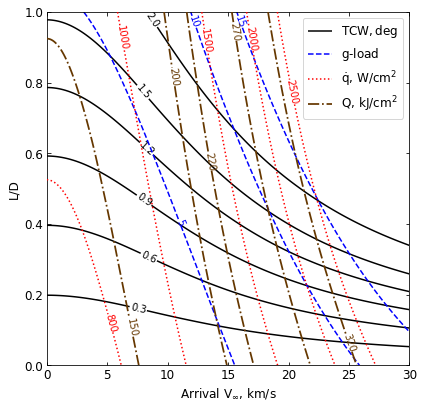

In [15]:
x = np.loadtxt('../data/jsr-paper/saturn/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/saturn/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   30,  310)
y_new =  np.linspace( 0.0,   1.0 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        #s1_new[i,j] = s1(x_new[i],y_new[j])





Z1 = z1_new

G1 = g1_new

Q1 = q1_new

#S1 = s1_new

H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)
#X, Y = meshgrid(x, y)


Zlevels = np.array([0.3, 0.6, 0.9, 1.2, 1.5, 2.0])

Glevels = np.array([5.0, 10.0, 15.0])
Qlevels = np.array([800.0, 1000.0, 1500.0, 2000.0, 2500.0])
Hlevels = np.array([150.0, 200.0, 220.0, 270.0, 320.0])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([6.5,6.5])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black',zorder=0)




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.1f',inline_spacing=1,zorder=0)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)
ZCS1.collections[4].set_linewidths(1.5)
ZCS1.collections[5].set_linewidths(1.5)



ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed',zorder=1)

plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0,zorder=1)



GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)


GCS1.collections[0].set_label(r'$g$'+r'-load')


QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted',zorder=13)

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0,zorder=13)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)
QCS1.collections[4].set_linewidths(1.5)


QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot',zorder=14)

plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0,zorder=14)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)
HCS1.collections[3].set_linewidths(1.75)
HCS1.collections[4].set_linewidths(1.75)



HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=12)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=12)



plt.savefig('../data/jsr-paper/saturn/saturn-lift-large.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/saturn/saturn-lift-large.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/saturn/saturn-lift-large.eps', dpi=300,bbox_inches='tight')


plt.show()